In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [84]:
%pip install xgboost

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder

#metricas de avaliação dos modelos
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\python312\lib\site-packages\vboxapi-1.0-py3.12.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


# Parte 2

In [4]:
# ler arquivo       
dados = pd.read_csv('../Inteligencia_artificial/LPL/dados_salarial_funcionarios.csv')

In [5]:
# Listando o nome das colunas
dados.columns

Index(['Idade', 'Genero', 'Nivel Ensino', 'Area Formacao', 'Setor', 'Nivel',
       'Faixa Salarial', 'Anos experiencia', 'Faixa Salarial – numero',
       'Data ultimo aumento'],
      dtype='object')

In [6]:
# Imprimindo as 5 primeiras linhas
dados.head()

,Idade,Genero,Nivel Ensino,Area Formacao,Setor,Nivel,Faixa Salarial,Anos experiencia,Faixa Salarial – numero,Data ultimo aumento
0,38,Masculino,Pós-graduação,Química / Física,Marketing,Gestor,de R$ 4.001/mês a R$ 6.000/mês,Mais de 10 anos,6000,02/01/21
1,39,Masculino,Pós-graduação,Economia/ Administração / Contabilidade / Fina...,Consultoria,Gestor,de R$ 6.001/mês a R$ 8.000/mês,de 2 a 3 anos,8000,06/04/21
2,30,Masculino,Pós-graduação,Computação / Engenharia de Software / Sistemas...,Indústria,Gestor,de R$ 8.001/mês a R$ 12.000/mês,de 1 a 2 anos,12000,15/04/23
3,38,Feminino,Pós-graduação,Outras,Serviços,Gestor,de R$ 12.001/mês a R$ 16.000/mês,Mais de 10 anos,16000,04/06/21
4,36,Masculino,Pós-graduação,Outras Engenharias,Varejo,Gestor,de R$ 8.001/mês a R$ 12.000/mês,de 1 a 2 anos,12000,22/03/23


In [7]:
# Observando número de linhas e colunas
dados.shape

(1385, 10)

---
## Parte 3: Análise Exploratória dos Dados (AED)

In [8]:
# Imprime o tipo de dado em cada coluna: object - variáveis categóricas; float64 e int64 - variáveis numéricas
dados.dtypes

Idade                       int64
Genero                     object
Nivel Ensino               object
Area Formacao              object
Setor                      object
Nivel                      object
Faixa Salarial             object
Anos experiencia           object
Faixa Salarial – numero     int64
Data ultimo aumento        object
dtype: object

In [9]:
# Coluna Data ultimo aumento está como varivável de texto. É preciso transformá-la para data
# Função to_datetime do Pandas
dados['Data ultimo aumento'] = pd.to_datetime(dados['Data ultimo aumento'])

In [10]:
# Criando categorias para separar colunas numéricas e categóricas: facilita a AED
numericas_cols = [col for col in dados.columns if dados[col].dtype != 'object']
categoricas_cols = [col for col in dados.columns if dados[col].dtype == 'object']

In [11]:
# Resumo das variáveis numéricas - Imprime alguns valores de medidas de tendências centrais 
dados[numericas_cols].describe()

,Idade,Faixa Salarial – numero,Data ultimo aumento
count,1385.000000,1385.000000,1385
mean,30.779783,9992.779783,2022-06-15 08:25:17.978339328
min,18.000000,1000.000000,2021-01-01 00:00:00
25%,26.000000,6000.000000,2021-09-19 00:00:00
50%,29.000000,8000.000000,2022-06-09 00:00:00
75%,34.000000,12000.000000,2023-03-05 00:00:00
max,54.000000,45000.000000,2023-12-28 00:00:00
std,6.869018,7353.675097,NaN


In [12]:
# Criando categorias para separar colunas numéricas e categóricas: facilita a AED
numericas_cols = [col for col in dados.columns if dados[col].dtype != 'object']
categoricas_cols = [col for col in dados.columns if dados[col].dtype == 'object']

In [13]:
# Verificando se existem valores faltantes nos dados 
dados.isna().any()

Idade                      False
Genero                     False
Nivel Ensino               False
Area Formacao               True
Setor                      False
Nivel                      False
Faixa Salarial             False
Anos experiencia           False
Faixa Salarial – numero    False
Data ultimo aumento        False
dtype: bool

In [14]:
# Verificando a quantidade de valores faltantes por coluna
dados.isna().sum()

Idade                       0
Genero                      0
Nivel Ensino                0
Area Formacao              24
Setor                       0
Nivel                       0
Faixa Salarial              0
Anos experiencia            0
Faixa Salarial – numero     0
Data ultimo aumento         0
dtype: int64

In [15]:
# Substituir os valores faltantes por "Nada consta". Argumento inplace = true significa que a modificação será aplicada  
# Na mesma variável - chamada dados - sem precisar criar outra variável (dados_2, dados_V2, etc)
dados['Area Formacao'].fillna('Nada Consta', inplace=True)

In [16]:
# Ou então, podemos excluir a coluna com valor faltante, se não for relevante para a análise (atenção ao fazer isso)
dados.drop('Area Formacao', axis=1, inplace=True)

## axis = 1 - sentido da coluna; axis = 2 - sentido das linhas

In [17]:
# Depois das correções, verificando se ainda há valores faltantes
dados.isna().sum()

Idade                      0
Genero                     0
Nivel Ensino               0
Setor                      0
Nivel                      0
Faixa Salarial             0
Anos experiencia           0
Faixa Salarial – numero    0
Data ultimo aumento        0
dtype: int64

In [18]:
# Verificando se temos valores duplicados
dados.duplicated().sum() 

0

In [19]:
# Removendo valores duplicados
dados.drop_duplicates(inplace=True)

In [20]:
# nº de linhas e colunas após mudanças. Caso houvesse dados duplicados, o número de linhas seria reduzido
dados.shape

(1385, 9)

In [21]:
# Contagem de valores por categoria de 'Nivel'
dados['Nivel'].value_counts()

Nivel
Pleno     440
Júnior    409
Sênior    370
Gestor    166
Name: count, dtype: int64

In [22]:
# Contagem de valores por categoria de 'Faixa Salarial'
dados['Faixa Salarial'].value_counts()

Faixa Salarial
de R$ 8.001/mês a R$ 12.000/mês     295
de R$ 6.001/mês a R$ 8.000/mês      255
de R$ 4.001/mês a R$ 6.000/mês      242
de R$ 12.001/mês a R$ 16.000/mês    140
de R$ 3.001/mês a R$ 4.000/mês      113
de R$ 2.001/mês a R$ 3000/mês       108
de R$ 1.001/mês a R$ 2.000/mês       79
de R$ 16.001/mês a R$ 20.000/mês     59
de R$ 20.001/mês a R$ 25.000/mês     26
de R$ 25.001/mês a R$ 30.000/mês     22
Menos de R$ 1.000/mês                19
de R$ 30.001/mês a R$ 40.000/mês     18
Acima de R$ 40.001/mês                9
Name: count, dtype: int64

In [23]:
# Criando uma nova coluna
# Função para calcular a média salarial dos funcionários
dados['Média Salarial'] = dados['Faixa Salarial – numero'].mean().round()

In [24]:
# Resultado após inserção de nova coluna
dados.head()

,Idade,Genero,Nivel Ensino,Setor,Nivel,Faixa Salarial,Anos experiencia,Faixa Salarial – numero,Data ultimo aumento,Média Salarial
0,38,Masculino,Pós-graduação,Marketing,Gestor,de R$ 4.001/mês a R$ 6.000/mês,Mais de 10 anos,6000,2021-02-01,9993.0
1,39,Masculino,Pós-graduação,Consultoria,Gestor,de R$ 6.001/mês a R$ 8.000/mês,de 2 a 3 anos,8000,2021-06-04,9993.0
2,30,Masculino,Pós-graduação,Indústria,Gestor,de R$ 8.001/mês a R$ 12.000/mês,de 1 a 2 anos,12000,2023-04-15,9993.0
3,38,Feminino,Pós-graduação,Serviços,Gestor,de R$ 12.001/mês a R$ 16.000/mês,Mais de 10 anos,16000,2021-04-06,9993.0
4,36,Masculino,Pós-graduação,Varejo,Gestor,de R$ 8.001/mês a R$ 12.000/mês,de 1 a 2 anos,12000,2023-03-22,9993.0


---
# Parte 4: Visualização dos resultados

#### O que queremos responder com esses dados?

### 1. Distribuição do nº de funcionários por sexo, nível de senioridade e nível de formação

Podemos fazer um gráfico com a distribuição de homens e mulheres

In [25]:
# Contagem do nº de homens e mulheres na empresa
valores_contados_1 = dados['Genero'].value_counts()
print(valores_contados_1)

Genero
Masculino    979
Feminino     406
Name: count, dtype: int64


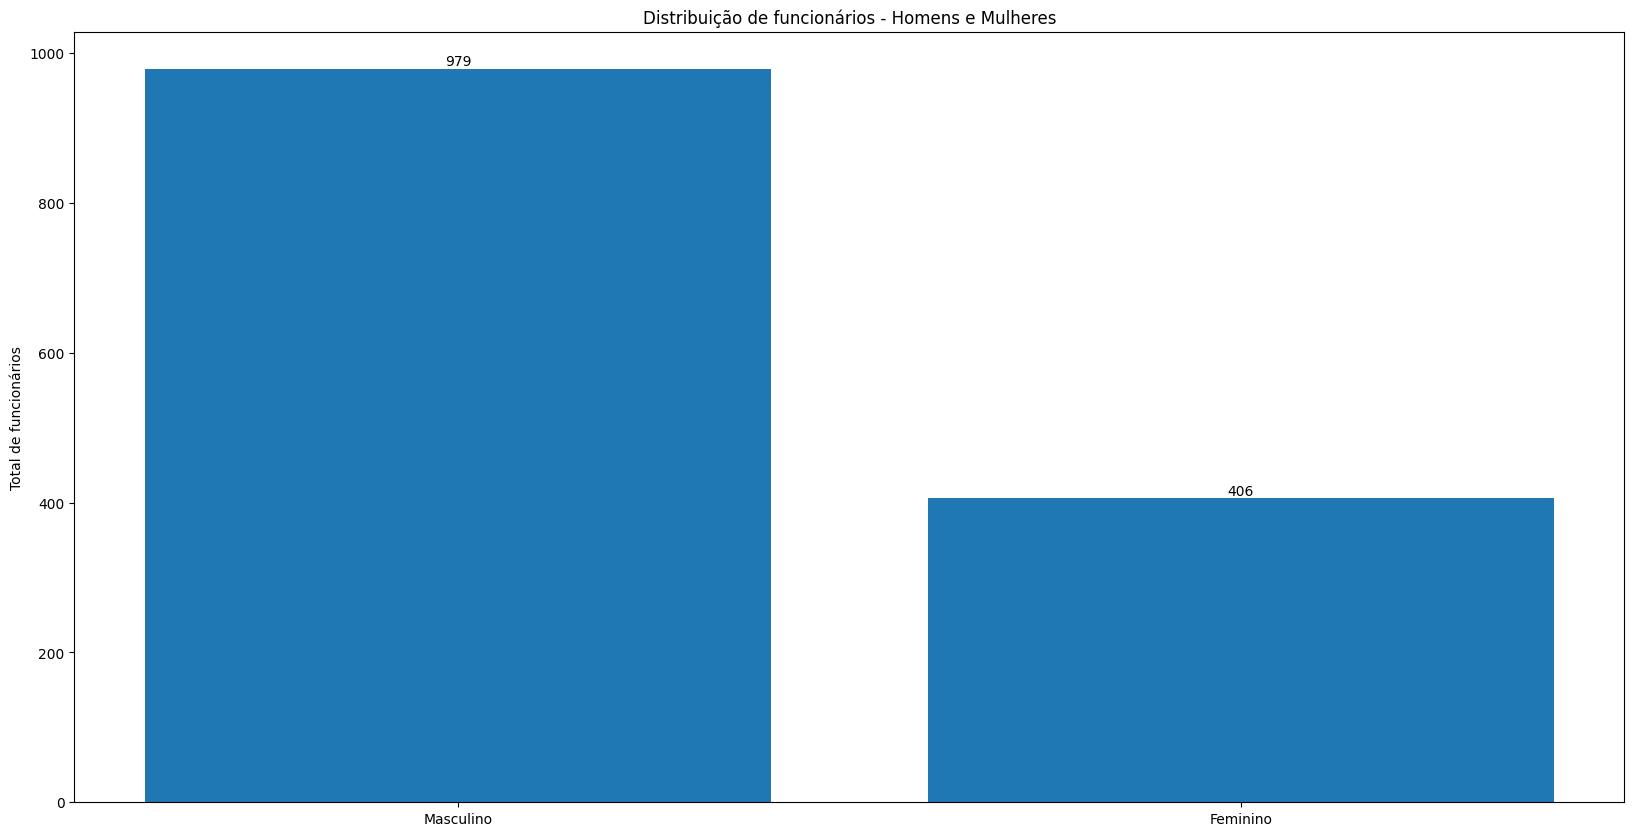

In [26]:
# Gráfico da distribuição por gênero - plt é a biblioteca Matplotlib
plt.figure(figsize=(20,10)) # Aumentar o tamanho da figura na saída dos dados
grafico_1 = plt.bar(valores_contados_1.index, valores_contados_1.values) # Variavel Nivel Ensino no eixo X
plt.title('Distribuição de funcionários - Homens e Mulheres') # plt.title para inserir título no gráfico
plt.ylabel('Total de funcionários'); # # plt.ylabel para inserir título no gráfico
plt.bar_label(grafico_1, size=10);

# Parte 5 Organização de dados

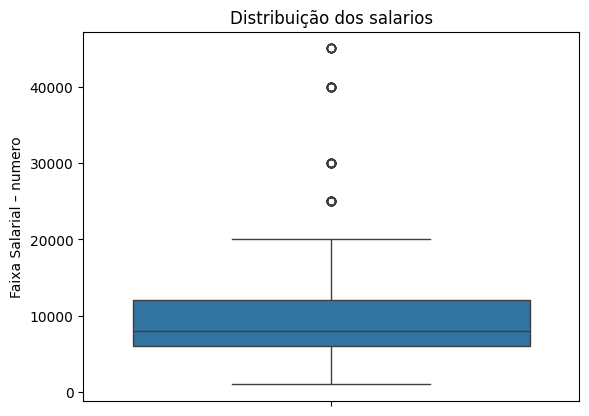

In [27]:
sns.boxplot(dados['Faixa Salarial – numero']).set_title('Distribuição dos salarios');

# Bolinhas OUTLAIRS
# Salarios muito diferentes do padrão
# Outlairs são valores que fogem do padrão

In [28]:
dados['Genero'] = LabelEncoder().fit_transform(dados['Genero'])
dados.head()

,Idade,Genero,Nivel Ensino,Setor,Nivel,Faixa Salarial,Anos experiencia,Faixa Salarial – numero,Data ultimo aumento,Média Salarial
0,38,1,Pós-graduação,Marketing,Gestor,de R$ 4.001/mês a R$ 6.000/mês,Mais de 10 anos,6000,2021-02-01,9993.0
1,39,1,Pós-graduação,Consultoria,Gestor,de R$ 6.001/mês a R$ 8.000/mês,de 2 a 3 anos,8000,2021-06-04,9993.0
2,30,1,Pós-graduação,Indústria,Gestor,de R$ 8.001/mês a R$ 12.000/mês,de 1 a 2 anos,12000,2023-04-15,9993.0
3,38,0,Pós-graduação,Serviços,Gestor,de R$ 12.001/mês a R$ 16.000/mês,Mais de 10 anos,16000,2021-04-06,9993.0
4,36,1,Pós-graduação,Varejo,Gestor,de R$ 8.001/mês a R$ 12.000/mês,de 1 a 2 anos,12000,2023-03-22,9993.0


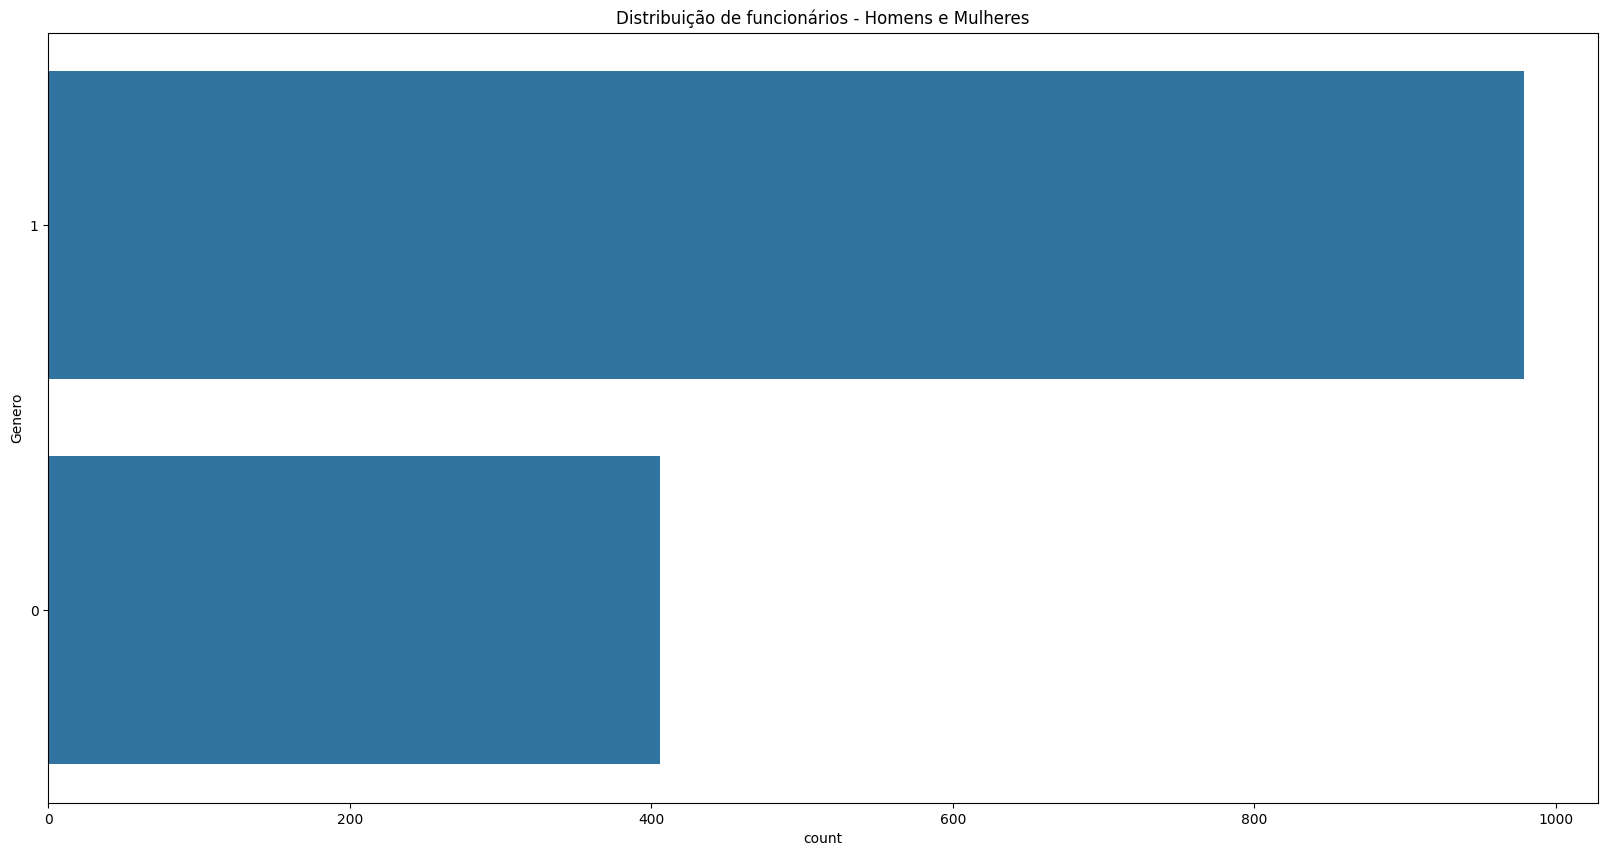

In [29]:
# Gráfico da biblioteca sns - Seaborn

# sns.countplot para criar gráfico de barras. Eixo X é a contagem (número de valores), eixo Y é a coluna de ordenação
# index para ordenar os valores
plt.figure(figsize=(20,10))
sns.countplot(y="Genero", data=dados, order=dados['Genero'].value_counts().index) \
.set_title("Distribuição de funcionários - Homens e Mulheres"); # set.title para inserir nome do gráfico

In [30]:
valores_contados_2 = dados['Nivel Ensino'].value_counts()
print(valores_contados_2)

Nivel Ensino
Graduação/Bacharelado         495
Pós-graduação                 452
Mestrado                      185
Estudante de Graduação        173
Doutorado ou Phd               56
Não tenho graduação formal     24
Name: count, dtype: int64


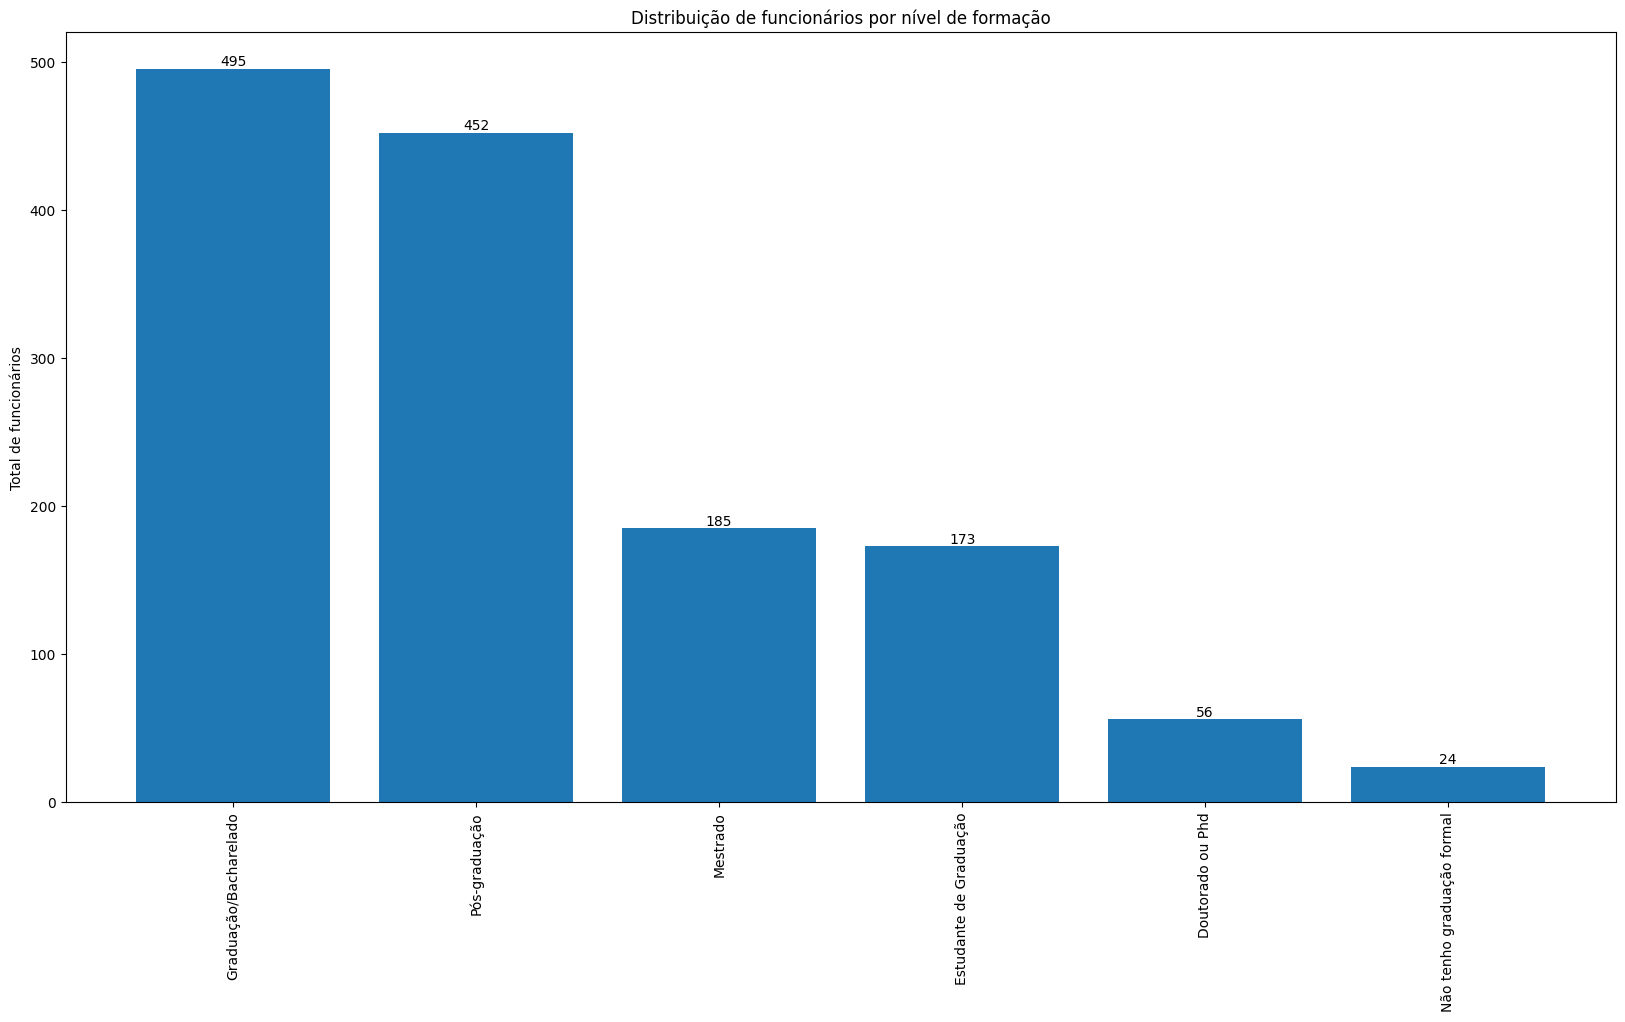

In [31]:
plt.figure(figsize=(20,10))
grafico_2 = plt.bar(valores_contados_2.index, valores_contados_2.values) # Variavel Nivel Ensino no eixo X
plt.title('Distribuição de funcionários por nível de formação') # Inserção do título
plt.ylabel('Total de funcionários') # Rótulo do eixo Y
plt.xticks(rotation=90); # xticks para indicar a rotação do texto no eixo X (90 graus)
plt.bar_label(grafico_2, size=10);

In [32]:
valores_contados_3 = dados['Nivel'].value_counts()
print(valores_contados_3)

Nivel
Pleno     440
Júnior    409
Sênior    370
Gestor    166
Name: count, dtype: int64


---
### 2. Evolução da média salarial ao longo do tempo, com base na data de último aumento

In [33]:
# Criando uma coluna somente com o ano de aumento
dados['Data ultimo aumento - Ano']=dados['Data ultimo aumento'].dt.year
dados.dtypes

Idade                                 int64
Genero                                int32
Nivel Ensino                         object
Setor                                object
Nivel                                object
Faixa Salarial                       object
Anos experiencia                     object
Faixa Salarial – numero               int64
Data ultimo aumento          datetime64[ns]
Média Salarial                      float64
Data ultimo aumento - Ano             int32
dtype: object

In [34]:
# Calculando a média por ano (coluna Data ultimo aumento - Ano) para saber se os salários aumentaram ou diminuíram entre 2021 e 2023
media_salarial_ano = dados.groupby(['Data ultimo aumento - Ano', 'Genero'])['Faixa Salarial – numero'].mean().round(0) # round para arrendodar
media_salarial_ano.head()

Data ultimo aumento - Ano  Genero
2021                       0          9695.0
                           1          9495.0
2022                       0          9331.0
                           1         11271.0
2023                       0          9440.0
Name: Faixa Salarial – numero, dtype: float64

In [35]:
# Utilizando a função reset_index para criar uma ordem e facilitar a criação do gráfico
media_salarial_ano = media_salarial_ano.reset_index(name='Salario Medio')
media_salarial_ano.head()

,Data ultimo aumento - Ano,Genero,Salario Medio
0,2021,0,9695.0
1,2021,1,9495.0
2,2022,0,9331.0
3,2022,1,11271.0
4,2023,0,9440.0


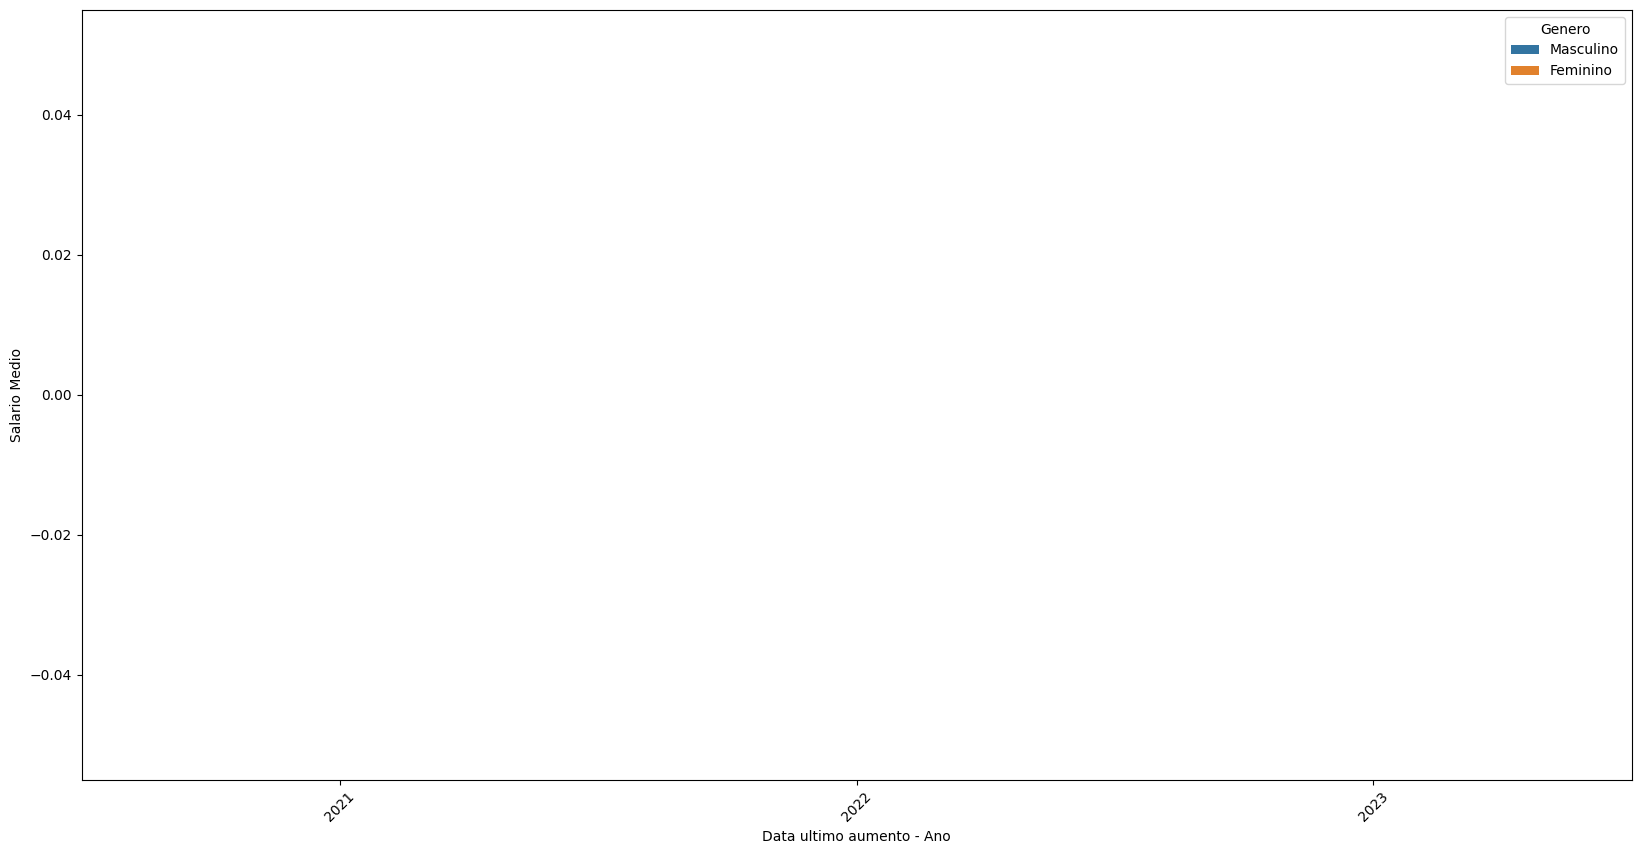

In [36]:
# Visualizando a média salarial por ano
plt.figure(figsize=(20,10)) # Aumentar tamanho da imagem que será impressa na tela
sns.barplot(x='Data ultimo aumento - Ano', y='Salario Medio', hue='Genero', data=media_salarial_ano, hue_order=['Masculino', 'Feminino'])
plt.xticks(rotation=45);


#### Houve um aumento médio no salário dos funcionários entre 2021 e 2022. Entre 2022 e 2023, houve uma queda

---
### 3. Distribuição salarial por nível de senioridade e gênero

In [37]:
# Agrupamento por gênero e nível do cargo - Júnior, Pleno, Sênior e Gestão
# Cálculo da média por nível do cargo e gênero
media_nivel_cargo = dados.groupby(['Genero', 'Nivel'])['Faixa Salarial – numero'].mean()
media_nivel_cargo.head()

Genero  Nivel 
0       Gestor    16491.803279
        Júnior     4985.074627
        Pleno      8910.569106
        Sênior    12386.363636
1       Gestor    16514.285714
Name: Faixa Salarial – numero, dtype: float64

In [38]:
# Utilizando a função reset_index para criar uma ordem e facilitar a criação do gráfico
media_nivel_cargo = media_nivel_cargo.reset_index(name='Salario Medio')
media_nivel_cargo.head()

,Genero,Nivel,Salario Medio
0,0,Gestor,16491.803279
1,0,Júnior,4985.074627
2,0,Pleno,8910.569106
3,0,Sênior,12386.363636
4,1,Gestor,16514.285714


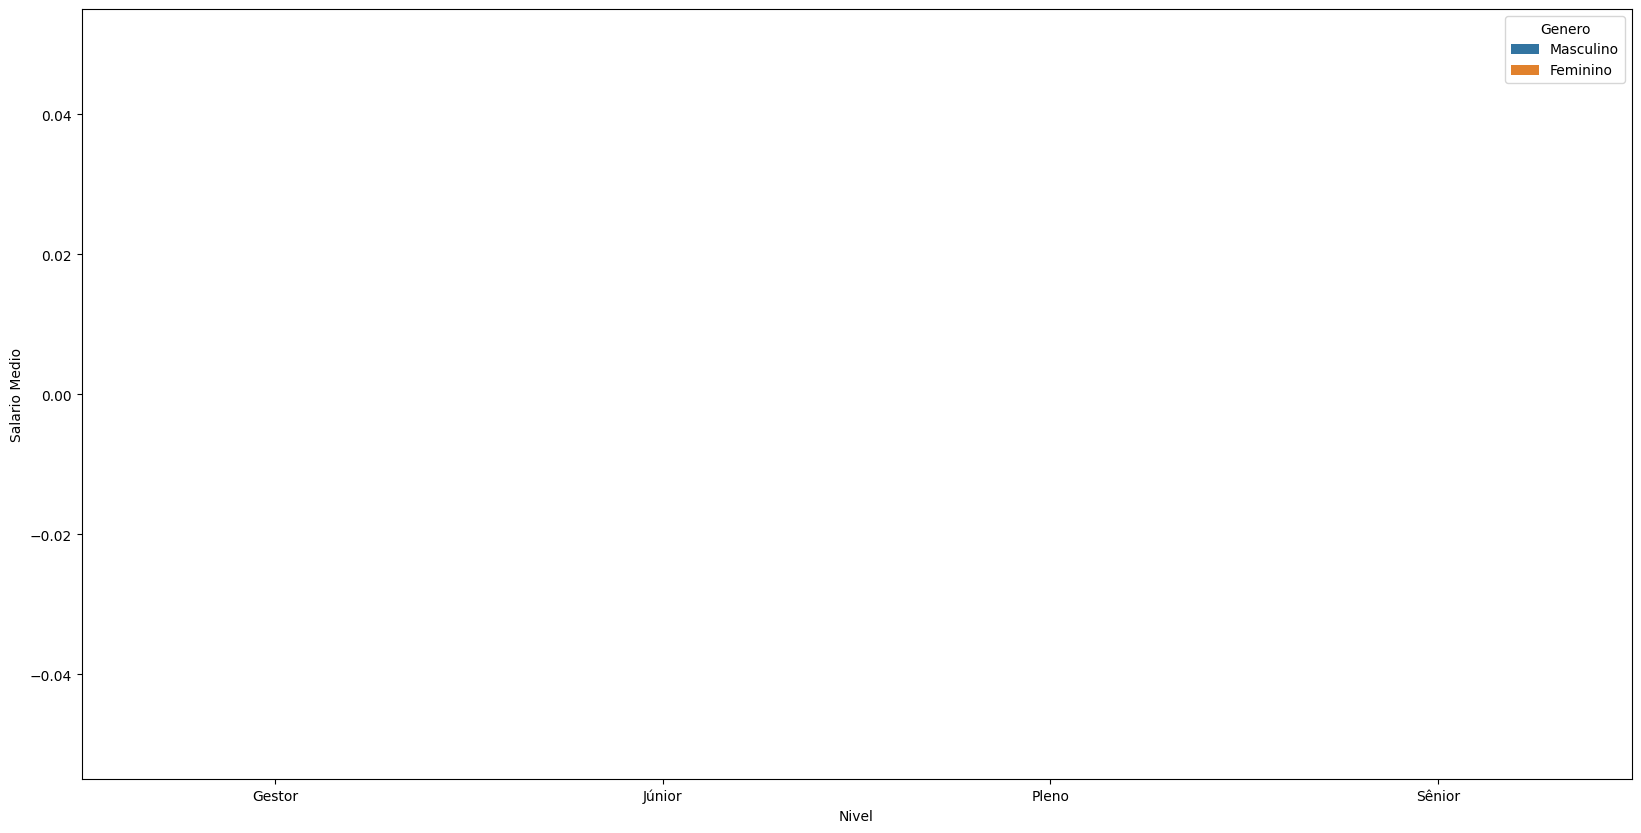

In [39]:
# Visualizando a média salarial por nível do cargo
plt.figure(figsize=(20,10))
sns.barplot(x='Nivel', y='Salario Medio', hue='Genero', data=media_nivel_cargo, hue_order=['Masculino', 'Feminino']);

---
### 4. Distribuição salarial por anos de experiência e gênero

### Vamos analisar os salários

Primeiro vamos fazer um histograma para analisar a distribuição geral dos salários

### Vamos analisar os salários

Primeiro vamos fazer um histograma para analisar a distribuição geral dos salários

<Axes: >

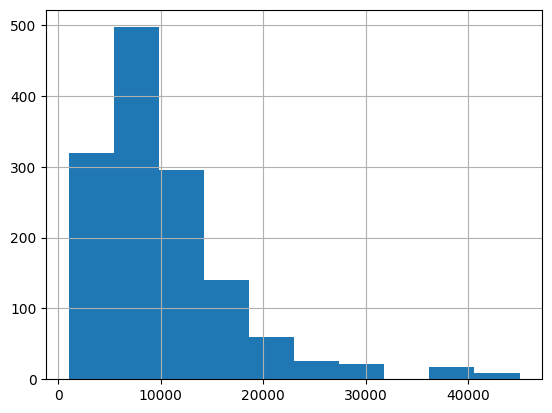

In [40]:
dados['Faixa Salarial – numero'].hist()

In [41]:
# Agrupamento por gênero e anos de experiência
# Cálculo da média por anos de experiência e gênero
media_anos_experiencia = dados.groupby(['Genero', 'Anos experiencia'])['Faixa Salarial – numero'].mean()
media_anos_experiencia.head()

Genero  Anos experiencia
0       Mais de 10 anos     15083.333333
        Menos de 1 ano       5388.888889
        de 1 a 2 anos        7540.229885
        de 2 a 3 anos        9512.195122
        de 4 a 5 anos       11685.714286
Name: Faixa Salarial – numero, dtype: float64

In [42]:
# Utilizando a função reset_index para criar uma ordem e facilitar a criação do gráfico
media_anos_experiencia = media_anos_experiencia.reset_index(name='Salario Medio')
media_anos_experiencia.head()

,Genero,Anos experiencia,Salario Medio
0,0,Mais de 10 anos,15083.333333
1,0,Menos de 1 ano,5388.888889
2,0,de 1 a 2 anos,7540.229885
3,0,de 2 a 3 anos,9512.195122
4,0,de 4 a 5 anos,11685.714286


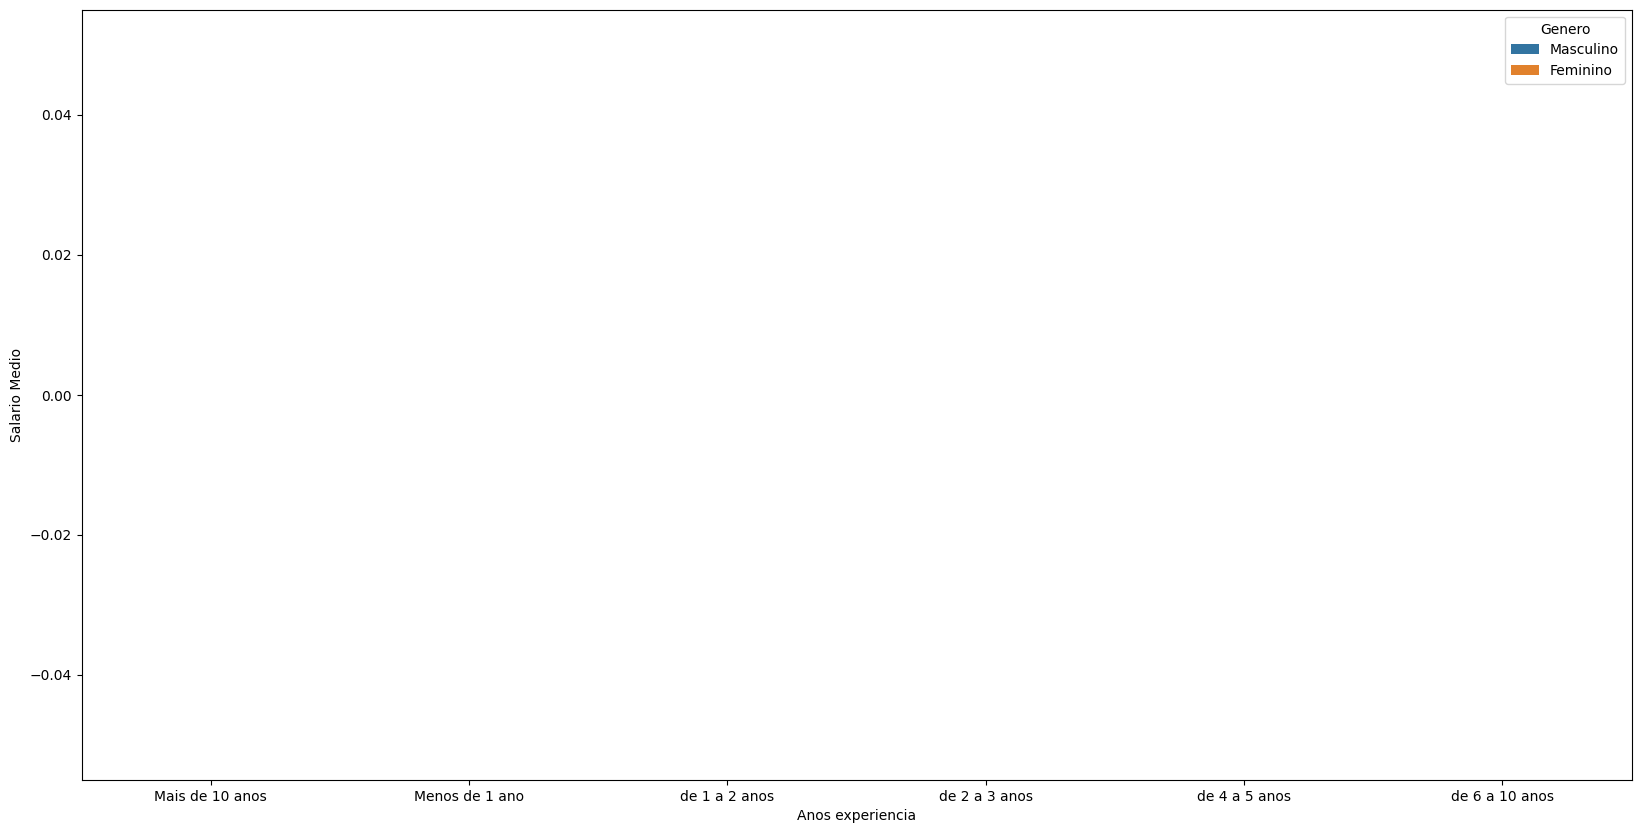

In [43]:
# Visualizando a média salarial por nível do cargo
plt.figure(figsize=(20,10))
sns.barplot(x='Anos experiencia', y='Salario Medio', hue='Genero', data=media_anos_experiencia, hue_order=['Masculino', 'Feminino']);

In [44]:
# Agrupamento por gênero e nível de escolaridade
# Cálculo da média por nível de escolaridade e gênero
media_nivel_escolaridade = dados.groupby(['Genero', 'Nivel Ensino'])['Faixa Salarial – numero'].mean()
media_nivel_escolaridade = media_nivel_escolaridade.reset_index(name='Salario Medio')

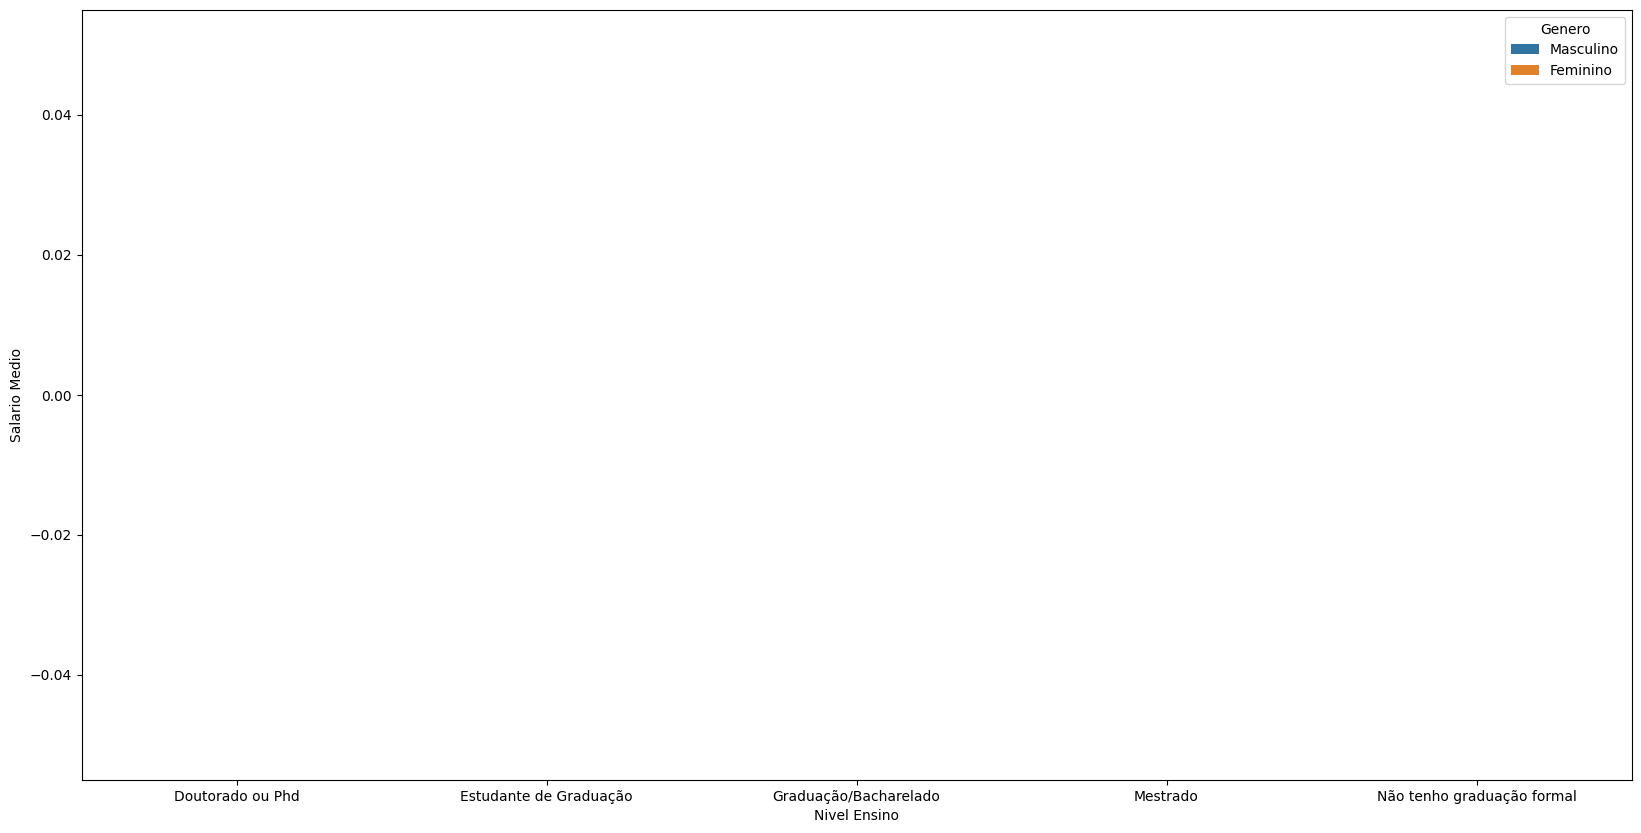

In [45]:
# Gráfico da média salarial por nível de escolaridade
plt.figure(figsize=(20,10))
sns.barplot(x='Nivel Ensino', y='Salario Medio', hue='Genero', data=media_nivel_escolaridade,
order=['Doutorado ou Phd', 'Estudante de Graduação', 'Graduação/Bacharelado','Mestrado', 'Não tenho graduação formal'], 
hue_order=['Masculino', 'Feminino']);

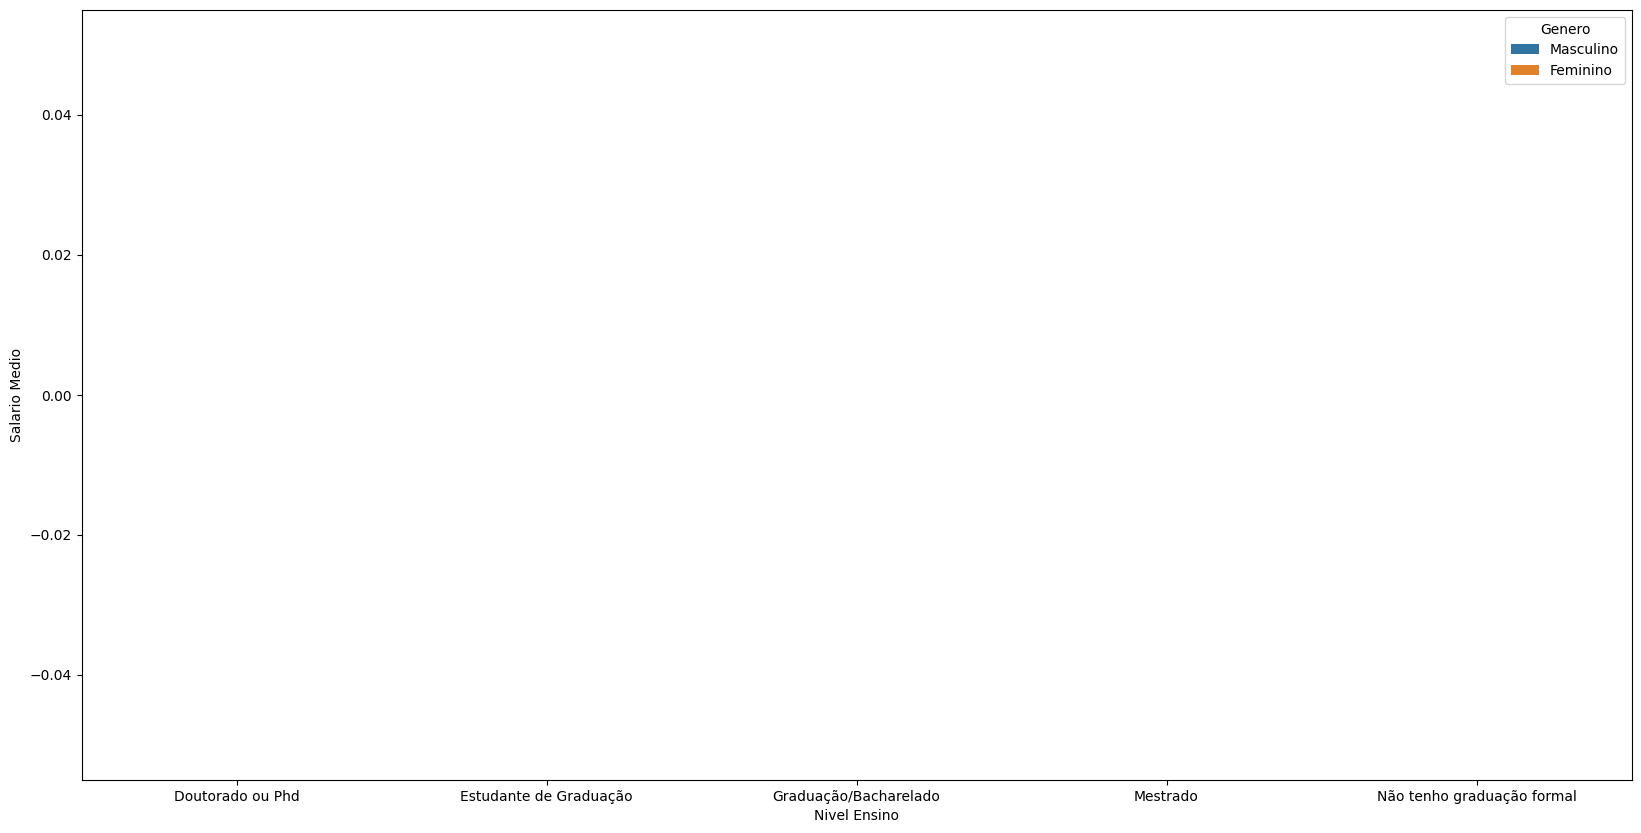

In [46]:
# Gráfico da média salarial por nível de escolaridade
plt.figure(figsize=(20,10))
sns.barplot(x='Nivel Ensino', y='Salario Medio', hue='Genero', data=media_nivel_escolaridade,
order=['Doutorado ou Phd', 'Estudante de Graduação', 'Graduação/Bacharelado','Mestrado', 'Não tenho graduação formal'], 
hue_order=['Masculino', 'Feminino']);

# 2. Divisão dos dados

In [47]:
dados['Genero'] = LabelEncoder().fit_transform(dados['Genero'])
dados.head()

,Idade,Genero,Nivel Ensino,Setor,Nivel,Faixa Salarial,Anos experiencia,Faixa Salarial – numero,Data ultimo aumento,Média Salarial,Data ultimo aumento - Ano
0,38,1,Pós-graduação,Marketing,Gestor,de R$ 4.001/mês a R$ 6.000/mês,Mais de 10 anos,6000,2021-02-01,9993.0,2021
1,39,1,Pós-graduação,Consultoria,Gestor,de R$ 6.001/mês a R$ 8.000/mês,de 2 a 3 anos,8000,2021-06-04,9993.0,2021
2,30,1,Pós-graduação,Indústria,Gestor,de R$ 8.001/mês a R$ 12.000/mês,de 1 a 2 anos,12000,2023-04-15,9993.0,2023
3,38,0,Pós-graduação,Serviços,Gestor,de R$ 12.001/mês a R$ 16.000/mês,Mais de 10 anos,16000,2021-04-06,9993.0,2021
4,36,1,Pós-graduação,Varejo,Gestor,de R$ 8.001/mês a R$ 12.000/mês,de 1 a 2 anos,12000,2023-03-22,9993.0,2023


In [68]:
# Função para atribuir valores numericos para com base nos anos de experiencia
def atribuir_valor_numeriico(categoria):
    print(categoria)
    if categoria == 'Menos de 1 ano':
        return 1
    elif categoria == 'de 1 a 2 anos':
        return 1.5
    elif categoria == 'de 2 a 3 anos':
        return 3.5
    elif categoria == 'de 4 a 5 anos':
        return 4.5
    elif categoria == 'de 6 a 10 anos':
        return 8
    elif categoria == 'Mais de 10 anos':
        return 15
    else:
        return None

dados['Anos experiencia - numerico'] = dados['Anos experiencia'].apply(atribuir_valor_numeriico)

Mais de 10 anos
de 2 a 3 anos
de 1 a 2 anos
Mais de 10 anos
de 1 a 2 anos
de 1 a 2 anos
Mais de 10 anos
de 1 a 2 anos
Mais de 10 anos
Mais de 10 anos
de 4 a 5 anos
de 4 a 5 anos
Mais de 10 anos
Mais de 10 anos
de 1 a 2 anos
de 1 a 2 anos
de 2 a 3 anos
de 6 a 10 anos
de 6 a 10 anos
Mais de 10 anos
Mais de 10 anos
de 6 a 10 anos
de 2 a 3 anos
de 1 a 2 anos
de 4 a 5 anos
de 4 a 5 anos
de 2 a 3 anos
de 2 a 3 anos
de 6 a 10 anos
de 4 a 5 anos
de 2 a 3 anos
de 1 a 2 anos
de 2 a 3 anos
Mais de 10 anos
de 6 a 10 anos
Mais de 10 anos
de 6 a 10 anos
de 6 a 10 anos
de 4 a 5 anos
Mais de 10 anos
de 2 a 3 anos
Mais de 10 anos
de 1 a 2 anos
Mais de 10 anos
Menos de 1 ano
de 4 a 5 anos
de 6 a 10 anos
de 4 a 5 anos
de 6 a 10 anos
de 2 a 3 anos
de 6 a 10 anos
de 4 a 5 anos
de 2 a 3 anos
Menos de 1 ano
Menos de 1 ano
de 6 a 10 anos
Menos de 1 ano
Menos de 1 ano
de 4 a 5 anos
de 2 a 3 anos
Mais de 10 anos
Mais de 10 anos
Mais de 10 anos
de 1 a 2 anos
de 2 a 3 anos
Mais de 10 anos
Mais de 10 anos
de 6 a 1

In [65]:
# Nome
dados.columns

Index(['Idade', 'Genero', 'Nivel Ensino', 'Setor', 'Nivel', 'Faixa Salarial',
       'Anos experiencia', 'Faixa Salarial – numero', 'Data ultimo aumento',
       'Média Salarial', 'Data ultimo aumento - Ano',
       'Anos experiencia - numerico'],
      dtype='object')

In [69]:
# Variaveis dados_num contém apenas variaveis numéricas de interesse (exclui o restante)
dados_num = dados.drop(['Nivel Ensino','Setor', 'Nivel',
                        'Faixa Salarial', 'Anos experiencia',
                       'Data ultimo aumento', 'Média Salarial', 'Data ultimo aumento - Ano'], axis=1)
dados_num.head()

,Idade,Genero,Faixa Salarial – numero,Anos experiencia - numerico
0,38,1,6000,15.0
1,39,1,8000,3.5
2,30,1,12000,1.5
3,38,0,16000,15.0
4,36,1,12000,1.5


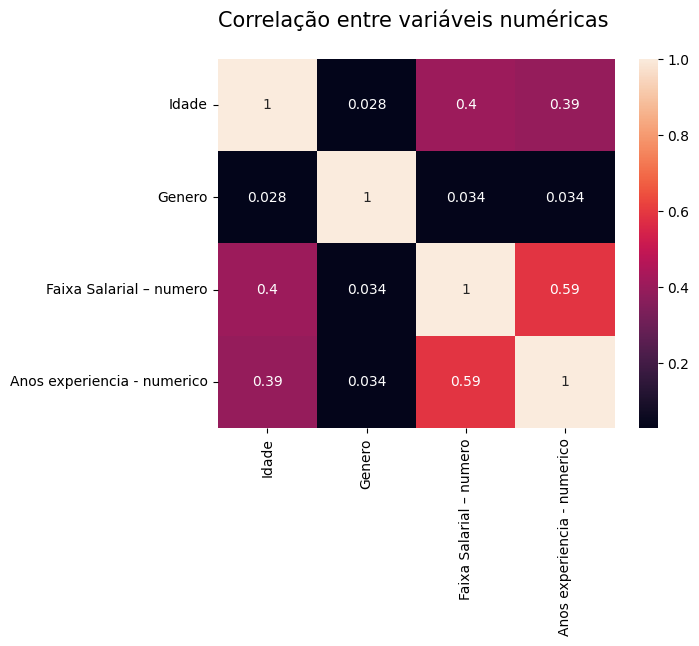

In [70]:
sns.heatmap(dados_num.corr('spearman'), annot=True)
plt.title('Correlação entre variáveis numéricas \n', fontsize=15)
plt.show()

In [71]:
x = dados_num.drop('Faixa Salarial – numero', axis=1)
x.head()


,Idade,Genero,Anos experiencia - numerico
0,38,1,15.0
1,39,1,3.5
2,30,1,1.5
3,38,0,15.0
4,36,1,1.5


In [72]:
y = dados_num['Faixa Salarial – numero']
y.head()


0     6000
1     8000
2    12000
3    16000
4    12000
Name: Faixa Salarial – numero, dtype: int64

In [73]:
X_train, X_test , y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [74]:
print(X_train.shape)
X_train.head(1)

(969, 3)


,Idade,Genero,Anos experiencia - numerico
772,31,1,8.0


# Treinamento do modelo

In [85]:
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)                                                                                                                                                                                                                                                                                                                                                                                                      

RandomForestRegressor()

In [76]:
valores_preditos_rf = model_rf.predict(X_test)

In [77]:
valores_preditos_rf

array([ 6000, 12000,  8000,  8000, 12000,  8000,  3000, 12000, 12000,
       12000,  8000,  3000,  8000,  3000, 12000, 12000,  3000,  8000,
        3000, 16000,  8000, 12000,  2000, 12000,  4000,  2000,  6000,
       12000, 16000,  8000,  8000, 12000,  6000, 16000,  2000, 12000,
        8000,  6000,  3000, 16000, 12000,  8000,  2000, 12000, 16000,
        8000,  8000, 12000,  8000,  6000,  8000,  6000, 20000,  4000,
        4000,  6000, 20000, 16000,  6000,  6000, 12000, 12000,  6000,
       16000, 12000, 16000, 12000,  2000,  4000,  4000,  4000, 12000,
       12000,  6000,  6000,  8000, 20000, 12000, 12000,  8000,  6000,
       12000,  8000,  8000, 12000,  3000,  6000,  6000,  6000,  6000,
        8000, 30000,  3000,  2000,  8000, 12000,  6000,  6000,  2000,
        6000, 16000, 12000,  2000,  6000,  6000,  8000, 12000,  8000,
       12000,  6000,  6000,  6000, 16000,  8000,  6000,  6000,  4000,
        2000,  4000, 12000, 12000,  4000,  6000,  6000,  8000,  4000,
       12000,  8000,

In [78]:
model_rf.feature_importances_
feature_importances = pd.DataFrame(model_rf.feature_importances_, index = X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
Idade,0.721392
Anos experiencia - numerico,0.249279
Genero,0.029329


In [79]:
mse = mean_squared_error(y_test, valores_preditos_rf)
mse

47901442.307692304

In [80]:
mae = mean_absolute_error(y_test, valores_preditos_rf)
mae

4512.0192307692305

In [81]:
r2_score(y_test, valores_preditos_rf)

0.0010484034622860738

# Testando o mesmo modelo, mas utilizando parametros do algoritimo Random Fortes

In [86]:
model_rf_parametros = RandomForestRegressor(max_depth=28, min_samples_leaf=32, min_samples_split=28,
                                            n_estimators=208, random_state=43)

In [87]:
model_rf_parametros.fit(X_train, y_train)

RandomForestRegressor(max_depth=28, min_samples_leaf=32, min_samples_split=28,
                      n_estimators=208, random_state=43)

In [89]:
model_rf_parametros.feature_importances_
feature_importances = pd.DataFrame(model_rf_parametros.feature_importances_, index = X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
Anos experiencia - numerico,0.837231
Idade,0.155928
Genero,0.006841


In [90]:
mse = mean_squared_error(y_test, valores_preditos_rf)
mae = mean_absolute_error(y_test, valores_preditos_rf)
r2_score(y_test, valores_preditos_rf)

0.0010484034622860738

In [91]:
model_xgboost = XGBRegressor()

In [92]:
model_xgboost.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [93]:
valores_preditos_xgboost = model_xgboost.predict(X_test)
valores_preditos_xgboost

array([ 5645.6226, 13068.446 , 20263.82  ,  8188.7925, 12262.426 ,
        6172.8945,  3766.3657, 12245.694 , 13068.446 , 11694.955 ,
       10533.964 ,  6551.2363,  6172.8945,  6551.2363, 14439.076 ,
        8352.578 ,  3572.5652,  9140.09  ,  4233.152 , 14042.099 ,
        9876.125 , 11694.955 ,  2244.4626, 12245.694 ,  4724.6436,
        5202.0527,  9288.821 , 15640.317 , 17288.87  ,  9140.09  ,
       10533.964 , 12002.522 ,  5391.0054, 13949.034 ,  7059.036 ,
       16678.75  ,  8881.32  ,  8720.666 ,  4055.7822, 17677.932 ,
       15867.892 ,  6004.2563,  1817.5685, 10006.239 , 14042.099 ,
        9330.148 , 10533.964 , 14083.922 ,  8942.644 ,  6897.338 ,
       10044.34  ,  6153.2266, 19770.596 ,  3973.9666, 15045.674 ,
       18513.246 , 11985.932 , 17133.785 ,  7820.617 ,  6337.9023,
       12740.406 , 15903.76  ,  8046.67  , 14529.529 ,  3585.4788,
       18370.352 , 12118.972 ,  4161.6553,  4547.606 ,  6183.4653,
        4290.2485, 16885.312 , 12677.458 ,  7820.617 ,  5645.6

In [95]:
model_xgboost.feature_importances_
feature_importances = pd.DataFrame(model_xgboost.feature_importances_, index = X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
Anos experiencia - numerico,0.613865
Idade,0.202229
Genero,0.183905


## metricas

In [ ]:
mse = mean_squared_error(y_test, valores_preditos_xgboost)
mae = mean_absolute_error(y_test, valores_preditos_xgboost)
r2_score(y_test, valores_preditos_xgboost)